# Milka Vladislav

C:\Users\Milka Vladislav\AppData\Local\Temp\ipykernel_14744\2193326078.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\Milka Vladislav\AppData\Local\Temp\ipykernel_14744\2193326078.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\Milka Vladislav\AppData\Local\Temp\ipykernel_14744\2193326078.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\Milka Vladislav\AppData\Local\Temp\ipykernel_14744\2193326078.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
C:\Users\Milka Vladislav\AppData\Local\Temp\ipykernel_14744\2193326078.py:33: Fu

,ім’я файлу,кольорова модель,формат,кількість каналів,розмір файлу (MB),ширина,висота,повний шлях,зменшене зображення
0,1-533x533-1.jpg,RGB,JPEG,3,0.03,533,533,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\1-533x533-1.jpg,
1,1108761.jpg,RGB,JPEG,3,0.07,600,594,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\1108761.jpg,
2,184712.jpg,RGB,JPEG,3,0.08,650,551,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\184712.jpg,
3,25693-19-nerealno-veselyx-foto-iz-zhizni-dikix-zhivotnyx-oni---luchshie-komedianty.jpg,RGB,JPEG,3,0.06,858,536,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\25693-19-nerealno-veselyx-foto-iz-zhizni-dikix-zhivotnyx-oni---luchshie-komedianty.jpg,
4,630_360_1487331223-9433.jpg,RGB,JPEG,3,0.04,630,360,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\630_360_1487331223-9433.jpg,
5,71animals.webp,RGB,WEBP,3,0.06,900,600,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\71animals.webp,
6,9a7adb79dd800aa15c3cc0e482e004c8.jpg,RGB,JPEG,3,0.03,600,390,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\9a7adb79dd800aa15c3cc0e482e004c8.jpg,
7,images.jpeg,RGB,JPEG,3,0.01,278,181,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\images.jpeg,
8,pies.webp,RGB,WEBP,3,0.05,900,596,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\pies.webp,
9,png-transparent-dog-tiger-lion-animal-forest-animals-meeting-animals-illustration-other-cat-like-mammal-carnivoran.png,P,PNG,1,0.17,920,604,c:\Users\Milka Vladislav\Desktop\Projects\jupyter-python\labs\lab_4\photos\png-transparent-dog-tiger-lion-animal-forest-animals-meeting-animals-illustration-other-cat-like-mammal-carnivoran.png,

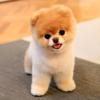
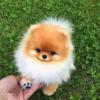
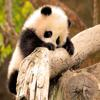
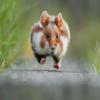
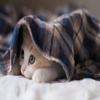
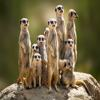
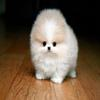
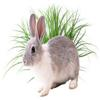
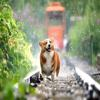
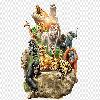
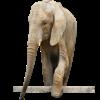
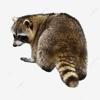
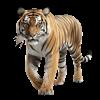
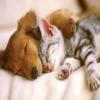
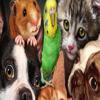

In [1]:
import os
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML, display

def image_info(folder_path):
    df_columns = ['ім’я файлу', 'кольорова модель', 'формат', 'кількість каналів', 
                  'розмір файлу (MB)', 'ширина', 'висота', 'повний шлях', 'зменшене зображення']
    df = pd.DataFrame(columns=df_columns)

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        abs_file_path = os.path.abspath(file_path)


        try:
            image = Image.open(file_path)
        except:
            continue

        img_format = image.format
        img_mode = image.mode
        img_channels = len(image.getbands())
        img_size = os.path.getsize(file_path) / (1024 * 1024)
        img_size = round(img_size, 2)
        img_width, img_height = image.size

        resized_image = image.resize((100, 100))
        img_base64 = image_base64(resized_image)

        df = df.append({
            'ім’я файлу': filename,
            'кольорова модель': img_mode,
            'формат': img_format,
            'кількість каналів': img_channels,
            'розмір файлу (MB)': img_size,
            'ширина': img_width,
            'висота': img_height,
            'повний шлях': abs_file_path,
            'зменшене зображення': f'<img src="data:image/{img_format.lower()};base64,{img_base64}">'
        }, ignore_index=True)

    return df

def image_base64(im, format='JPEG'):
    if im.mode != 'RGB':
        im = im.convert('RGB')

    with BytesIO() as buffer:
        im.save(buffer, format=format)
        return base64.b64encode(buffer.getvalue()).decode()

folder_path = 'photos/'
df_images = image_info(folder_path)

display(HTML(df_images.to_html(escape=False)))


In [4]:
import os
import random
from PIL import Image, ImageFilter, ImageEnhance

def generate_poster(folder_path, poster_name, columns, rows):
 
    image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    selected_images = random.sample(image_files, columns * rows)

    color_filters = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan']
    selected_colors = random.choices(color_filters, k=len(selected_images))

    image_size = (500, 500)

    poster = Image.new('RGB', (columns * image_size[0], rows * image_size[1]))

    for i in range(rows):
        for j in range(columns):
            image_path = os.path.join(folder_path, selected_images[i * columns + j])
            original_image = Image.open(image_path)
            if original_image.mode == 'P':
                original_image = original_image.convert('RGB')
            cropped_image = crop_and_resize(original_image, image_size)
            colored_image = apply_color_filter(cropped_image, selected_colors[i * columns + j])
            poster.paste(colored_image, (j * image_size[0], i * image_size[1]))

    poster.save(poster_name)

def crop_and_resize(image, target_size):
    width, height = image.size
    left = (width - min(width, height)) / 2
    top = (height - min(width, height)) / 2
    right = (width + min(width, height)) / 2
    bottom = (height + min(width, height)) / 2

    cropped_image = image.crop((left, top, right, bottom))
    resized_image = cropped_image.resize(target_size)

    return resized_image

def apply_color_filter(image, selected_color):
    if selected_color == 'red':
        enhancer = ImageEnhance.Color(image)
        colored_image = enhancer.enhance(2.0) 
    elif selected_color == 'green':
        enhancer = ImageEnhance.Color(image)
        colored_image = enhancer.enhance(0.5)  
    elif selected_color == 'blue':
        enhancer = ImageEnhance.Color(image)
        colored_image = enhancer.enhance(0.5)  
    elif selected_color == 'yellow':
        colored_image = ImageEnhance.Brightness(image).enhance(1.2)  
    elif selected_color == 'purple':
        colored_image = image.convert('RGB')
        colored_image = ImageEnhance.Color(colored_image).enhance(0.5) 
    elif selected_color == 'cyan':
        colored_image = image.convert('RGB')
        colored_image = ImageEnhance.Color(colored_image).enhance(1.5)  
    else:
        colored_image = image
    return colored_image

folder_path = 'photos/'

generate_poster(folder_path, 'poster1.jpg', columns=1, rows=4)
generate_poster(folder_path, 'poster2.jpg', columns=7, rows=7)
generate_poster(folder_path, 'poster3.jpg', columns=4, rows=1)


ValueError: Sample larger than population or is negative